# TASK3 :Exploratory Data Analysis - Retail
### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
## By: Chakradhar Reddy Yerragudi

### Import Necessary Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns



### Read the data

In [52]:
data=pd.read_csv('./SampleSuperstore.csv')

### Have a look at the data

In [53]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [93]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


### We dont need Postal code for our analysis so drop it

In [99]:
data.drop('Postal Code',axis=1,inplace=True)

### Handle duplicates and missing values

In [96]:
data.duplicated().value_counts()

False    9977
dtype: int64

In [97]:
data.drop_duplicates(inplace=True)

In [98]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Perform Univariate Analysis

<AxesSubplot:>

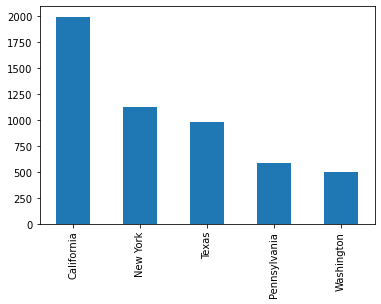

In [73]:
data['State'].value_counts().head().plot.bar()

<AxesSubplot:>

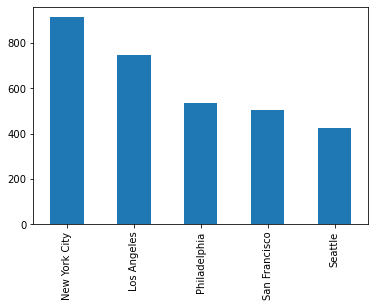

In [74]:
data['City'].value_counts().head().plot.bar()

<AxesSubplot:>

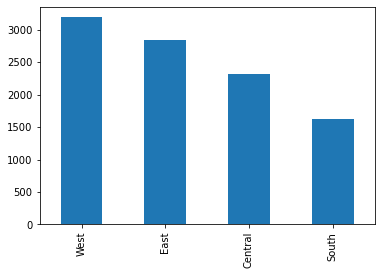

In [75]:
data['Region'].value_counts().plot.bar()

<AxesSubplot:>

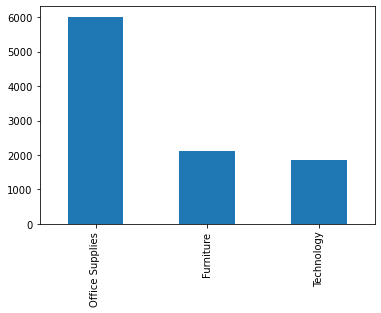

In [76]:
data['Category'].value_counts().plot.bar()

<AxesSubplot:>

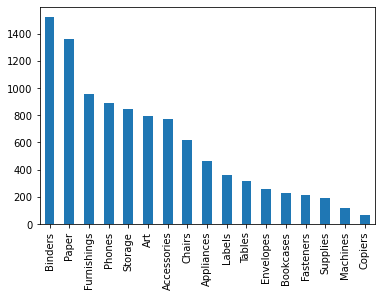

In [77]:
data['Sub-Category'].value_counts().plot.bar()

<AxesSubplot:>

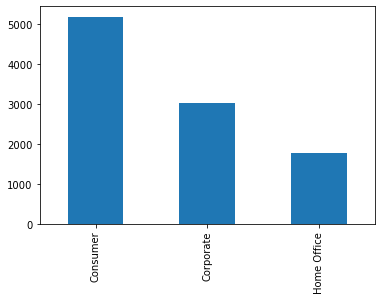

In [78]:
data['Segment'].value_counts().plot.bar()

<AxesSubplot:>

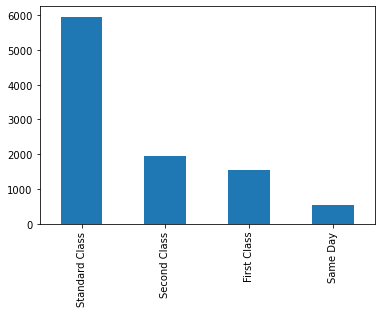

In [79]:
data['Ship Mode'].value_counts().plot.bar()


<AxesSubplot:ylabel='Quantity'>

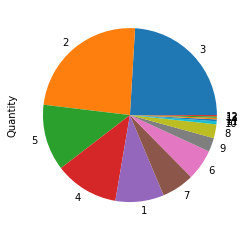

In [102]:
data['Quantity'].value_counts().plot.pie()

### From above pie chart we can conclude that Most Customers buy quantity 2 or 3

### Perform Bivariate Analysis

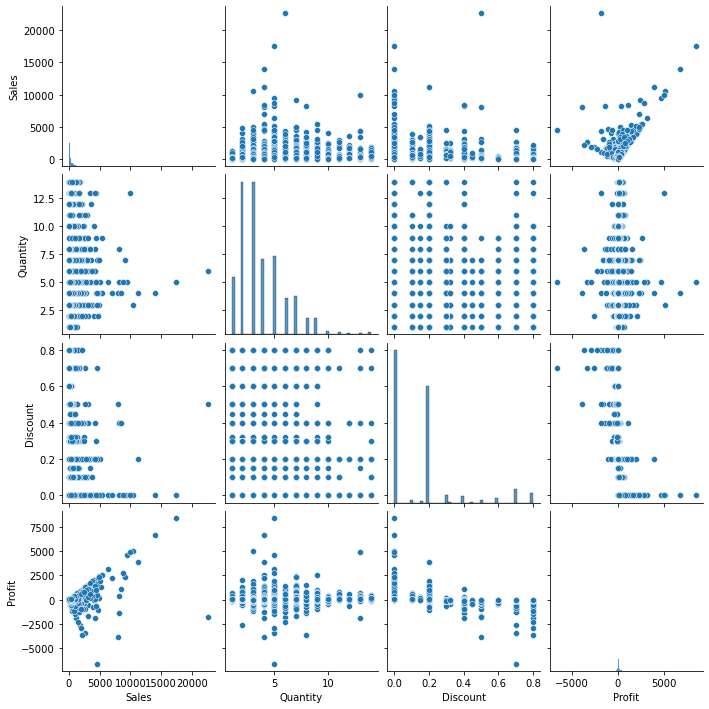

In [101]:
sns.pairplot(data)

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

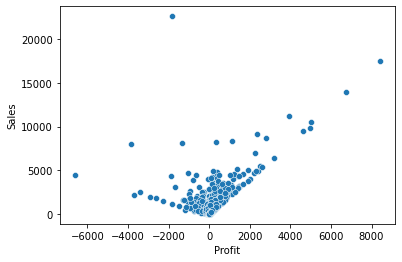

In [91]:
sns.scatterplot(x=data['Profit'],y=data['Sales'])

### We can observe that sales and profit are correlated

<AxesSubplot:>

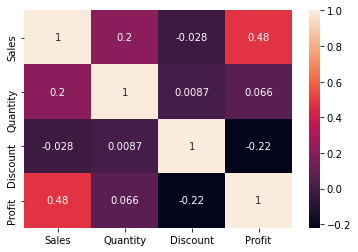

In [100]:
sns.heatmap(data.corr(),annot=True)

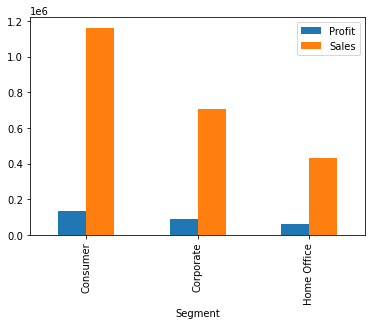

In [85]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar()
plt.legend()

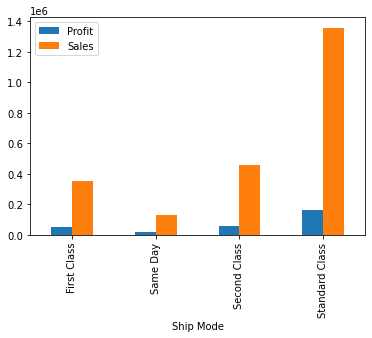

In [86]:
data.groupby('Ship Mode')[['Profit','Sales']].sum().plot.bar()
plt.legend()

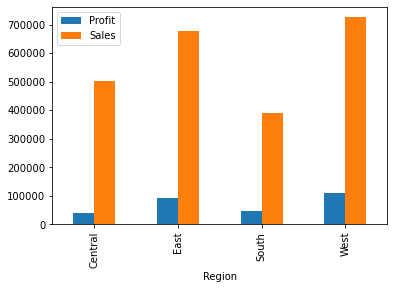

In [87]:
data.groupby('Region')[['Profit','Sales']].sum().plot.bar()
plt.legend()

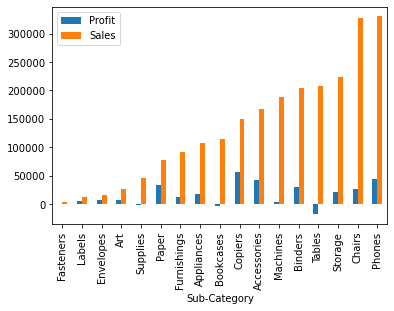

In [88]:
data.groupby('Sub-Category')[['Profit','Sales']].sum().sort_values(by='Sales').plot.bar()
plt.legend()

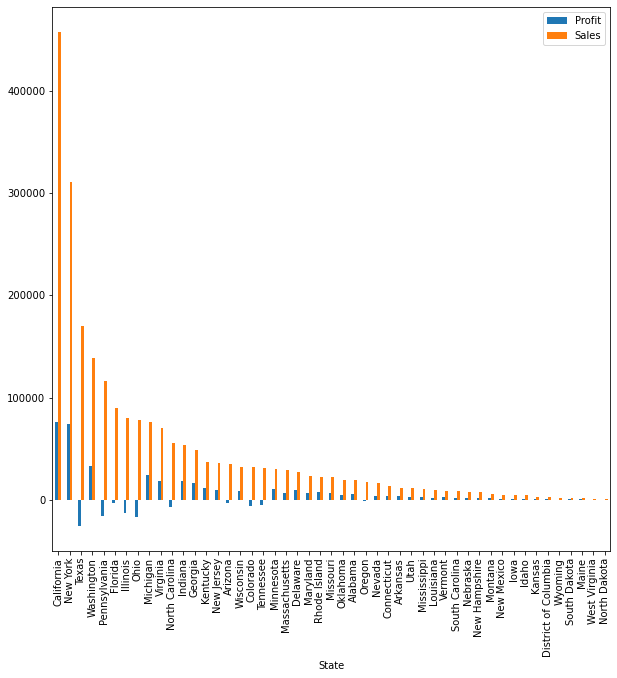

In [89]:
data.groupby('State')[['Profit','Sales']].sum().sort_values(by='Sales',ascending=False).plot.bar(figsize=(10,10))
plt.legend()

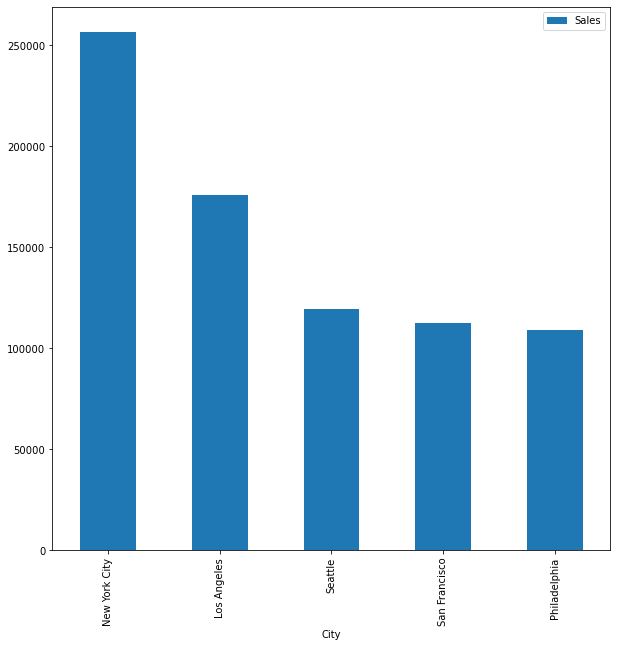

In [90]:
data.groupby('City')[['Sales']].sum().sort_values(by='Sales',ascending=False).head().plot.bar(figsize=(10,10))
plt.legend()

# Final Observations


* Sales and Profit are correlated
* In Cities New Yoyk City Has Highest Sales
* In States California and New York have high Sales and Profit
* Phone and Chairs have High sales among Sub-categories
* West Region has high sales and profit
* Consumer Segment Has high Sales and Profit
* Most Customes Buy Quantity of 2 or 3